In [182]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/alessandro/opt/anaconda3/envs/main/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
files = glob.glob("./*_batch_results.csv")

In [4]:
print(files)

['./Batch_3797042_batch_results.csv', './Batch_3841374_batch_results.csv', './Batch_3796768_batch_results.csv', './Batch_3805226_batch_results.csv', './Batch_3799572_batch_results.csv', './Batch_3828151_batch_results.csv', './Batch_3668978_batch_results.csv', './Batch_3805083_batch_results.csv', './Batch_3668976_batch_results.csv']


In [28]:
df = pd.DataFrame()
for f in files:
    csv = pd.read_csv(f)
    df = df.append(csv)

In [29]:
print(df.dtypes[10:20])

AutoApprovalDelayInSeconds      int64
Expiration                     object
NumberOfSimilarHITs           float64
LifetimeInSeconds             float64
AssignmentId                   object
WorkerId                       object
AssignmentStatus               object
AcceptTime                     object
SubmitTime                     object
AutoApprovalTime               object
dtype: object


In [30]:
tokeep = ["HITTypeId", "WorkerId", "AcceptTime", "SubmitTime"]

In [31]:
df = df[tokeep]

In [32]:
df['SubmitTime'] = pd.to_datetime(df['SubmitTime'])

/Users/alessandro/opt/anaconda3/envs/main/lib/python3.6/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/alessandro/opt/anaconda3/envs/main/lib/python3.6/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [33]:
df['AcceptTime'] = pd.to_datetime(df['AcceptTime'])

In [165]:
def accept_diff(group, threshold=2):
    g = group.sort_values(by=['AcceptTime'])
    times = g.AcceptTime.diff().apply(lambda x: x.total_seconds()).dropna()
    l = len(times)
    if l == 0:
        return pd.Series({'plugin_ratio':0,'n_HITs':0})
    else:
        return pd.Series({'plugin_ratio':sum(times<threshold)/l,'n_HITs':l})

In [172]:
worker_plugin = df.groupby(by=['WorkerId','HITTypeId'],as_index=False).apply(accept_diff).sort_values(by=['n_HITs','plugin_ratio'],ascending=False)

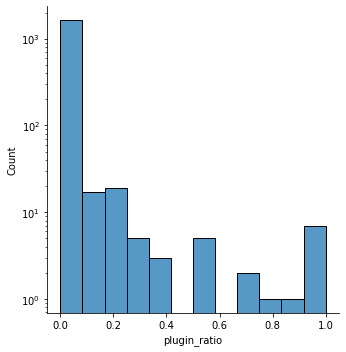

In [191]:
sns.displot(data=worker_plugin,x='plugin_ratio').set(yscale="log");
#distribution of workers with different proportion of almost-instantly reserved HITs

In [188]:
# how many with more than 10% of hits accepted in less than threshold, excluding workers with less than 5 HITs
len(worker_plugin[(worker_plugin.plugin_ratio>0.1) & ((worker_plugin.n_HITs>5))])

50

In [189]:
# that is a ratio of 
len(worker_plugin[(worker_plugin.plugin_ratio>0.1) & ((worker_plugin.n_HITs>5))])/len(worker_plugin)

0.02965599051008304

In [178]:
df.WorkerId.nunique()

1314

In [190]:
len(df)

63967